# Final Exam : Numerical Part
You will need to ensure that you have `utilsfinal` in the folder in which you are running the notebook, and also have the provided figures in a folder called `finalfigs` also in the same directory.

## Attention: 
you need to upload a ziped file with the notebook and the images you generated to this Canvas assignment to get credit!! Just zip up the file you open from here (called 'finalexam') after you edit the code and add your name to the title --- e.g., `finalexam_lastname_firstname.zip`

and you need to upload your pdf including the **print out of the pdf of the notebook** to gradescope!!

In [241]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import scipy.linalg as sla
from skimage import img_as_ubyte
from imageio import imread, imwrite
from sklearn.preprocessing import StandardScaler

%matplotlib inline

%load_ext autoreload
%autoreload 2

from utilsfinal import *
floc='./finalfigs/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# [Problem 1] Parts f-h: Least Squares Variant
In this problem, we will use the least squares variant from **Problem 1** to approximately learn the lighting in a photograph, which we can then use to paste new objects into the image while still maintaining the realism of the image. You will be estimating the lighting coefficients for the interior of St. Peter’s Basillica, and you will then use these coefficients to change the lighting of an image of a tennis ball so that it can be pasted into the image. 

In the figure below, on the left, we show the result of pasting the tennis ball in the image without adjusting the lighting on the ball. The ball looks too bright for the scene and does not look like it would fit in with other objects in the image. On the right we see the same figure with a lighting adjustment so that the ball looks more natural in the scene.

<img src="./finalfigs/tennis_fig1.png" width="1000"  />

To convincingly add a tennis ball to an image, we need to need to apply the appropriate lighting from the environment onto the added ball. To start, we will represent environment lighting as a spherical function $f(v)$ where $v$ is a three dimensional unit vector (i.e. $\|v\|_2=1$), and $f$ outputs a three dimensional color vector, one component for red, green, and blue light intensities.

Because $f(v)$ is a spherical function, the input $v$ must correspond to a point on a sphere. The function $f(v)$ represents the total incoming light from the direction $v$ in the scene. The lighting function of a spherical object $f(v)$ can be approximated by the first nine spherical harmonic basis functions which are given by
\begin{equation}
\begin{array}{lllll}
&L_1=1, \quad &L_2=y, \quad &L_3=x, \quad &L_4=z, \quad &L_5=xy\\
&L_6=yz, \quad &L_7=3x^2-1,\quad &L_8=xz, \quad &L_9=x^2-y^2 &
\end{array}
\end{equation}
where $v=\begin{bmatrix} x & y & z\end{bmatrix}^\top$.

The lighting function can then be approximated as
$$f(v)\approx \sum_{i=1}^9 \gamma_iL_i(v)$$
i.e.
$$\underbrace{\begin{bmatrix}\text{---}& f(v_1) & \text{---}\\
& \vdots & \\
\text{---}& f(v_m) & \text{---}\end{bmatrix}}_{\in \mathbb{R}^{m\times 3}}=\underbrace{\begin{bmatrix}L_1(v_1) & L_2(v_1) & \cdots & L_9(v_1)\\
L_1(v_2) & L_2(v_2) & \cdots & L_9(v_2)\\
\vdots & \vdots & \cdots & \vdots\\
L_1(v_m) & L_2(v_m) & \cdots & L_9(v_m)\end{bmatrix}}_{\in \mathbb{R}^{m\times 9}}\underbrace{\begin{bmatrix}\text{---}&\gamma_1 & \text{---}\\
& \vdots & \\
\text{---}& \gamma_9 & \text{---}\end{bmatrix}}_{\in \mathbb{R}^{9\times 3}}$$
wher $L_i(v)$ is the $i$--th basis function from the list above.

The function of incoming light $f(v)$ can be measured by photographing a spherical mirror placed in the scene of interest. In this case, we provide you with an image of the sphere as seen in the figure below.
<img src="./finalfigs/stpeters_probe_small.png" width="200"  />

In the code provided in `utilsfinal.py`, there is a function `extractNormals(img)` that will extract the training pairs $(v_i , f (v_i ))$ from the image. 
There is also a provided function `computeBasis(vs)` which will take in the `vs` values from `extractNormal(img)` and return the $A$ matrix. 
An example using this function is given in the next block.

In [288]:
data,tennis,target = loadImages()
vs, ys = extractNormals(data) # ys are the observed intesities, vs are the normal vectors
A = computeBasis(vs) # computes matrix of basis functions applied to the normal vectors v_i

### Part f
**TO DO:** Use the spherical harmonic basis functions to create a nine dimensional feature vector for each sample. Use this to formulate an **ordinary least squares** problem and solve for the unknown coefficients $\gamma_i$. Report the estimated values for $\gamma_i$ and include a visualization of the approximation using the provided code. Use the solution using the formula we learned in Module 2 for matrix least squares. 

**Helpful Hint**: Make sure you check dimensions as you are working through the code. This is a good debugging technique. 

Least squares:
[[202.31845431 162.41956802 149.07075034]
 [-27.66555164 -17.88905339 -12.92356688]
 [ -5.15203925  -4.51375871  -4.24262639]
 [ -1.08629293   0.42947012   1.15475569]
 [ -3.14053107  -3.70269907  -3.74382934]
 [ 23.67671768  23.15698002  21.94638397]
 [ -3.82167171   0.57606634   1.81637483]
 [  4.7346737    1.4677692   -1.12253649]
 [ -9.72739616  -5.75691108  -4.8395598 ]]


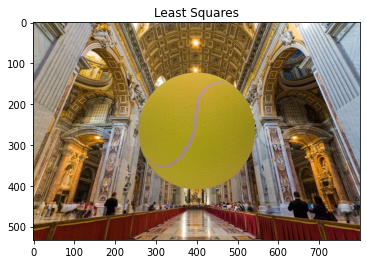

In [296]:
def OLS(A, ys):
    '''
    Ordinary Matrix Least Squares Solver
    Inputs:
    - A is m x 9
    - vs is m x 3
    
    Outputs:
    - coeff: coefficients of least squares, should be 9 x 3
    '''
    
    ## Your code goes here
    coeff = np.linalg.lstsq(A, ys, rcond=None)[0]
    return coeff

# reduce the number of samples because computing the SVD on
# the entire data set takes too long
Ap = A[::50]
ysp = ys[::50]

coeffLSQ = OLS(Ap,ysp) # run OLS
imgLSQ = relightSphere(tennis,coeffLSQ) # calls a function to render the sphere given the relighting coefficients
targetLSQ = compositeImages(imgLSQ,target) # build the image of the relight sphere in St. Peters

print('Least squares:\n'+str(coeffLSQ))
plt.figure()
plt.imshow(targetLSQ)
plt.title('Least Squares')
plt.show()

imwrite(floc+'OLS_output.png',img_as_ubyte(targetLSQ))

### Part g

When we extract from the data the direction n to compute $(v_i,f(v_i))$, we make some approximations about how the light is captured on the image. We also assume that the spherical mirror is a perfect sphere, but in reality, there will always be small imperfections. Thus, our measurement for $v$ contains some error, which makes this an ideal problem to apply the least squares variant described in the problem statement for **Problem 1** given in the exam pdf.

**TO DO:** Solve this problem with the **least squares variant** by allowing perturbations in the matrix of basis functions. Report the estimated values for $\gamma_i$ and include a visualization of the approximation. The output image will be visibly wrong, and we'll explore how to fix this problem in the next part. Your implementation may only use `numpy.linalg.svd` and the matrix inverse functions from the linear algebra library in `numpy` as well as `np.linalg.solve`.

$$\underbrace{\begin{bmatrix}\text{---}& f(v_1) & \text{---}\\
& \vdots & \\
\text{---}& f(v_m) & \text{---}\end{bmatrix}}_{=:y\in \mathbb{R}^{m\times 3}}=\underbrace{\begin{bmatrix}L_1(v_1) & L_2(v_1) & \cdots & L_9(v_1)\\
L_1(v_2) & L_2(v_2) & \cdots & L_9(v_2)\\
\vdots & \vdots & \cdots & \vdots\\
L_1(v_m) & L_2(v_m) & \cdots & L_9(v_m)\end{bmatrix}}_{=:A\in \mathbb{R}^{m\times 9}}\underbrace{\begin{bmatrix}\text{---}&\gamma_1 & \text{---}\\
& \vdots & \\
\text{---}& \gamma_9 & \text{---}\end{bmatrix}}_{=:\gamma\in \mathbb{R}^{9\times 3}}$$


In [345]:
def LSV(A, ys):
    '''
    Least Squares Variant
    Inputs:
    - A: m x 9 data matrix
    - y: m x 3 observation matrix

    Outputs:
    - coeff: 9 x 3 matrix of coefficients "gamma"
    '''
    # Build the combined matrices
    XY = A
    for i in range(ys.shape[1]):
        np.append(XY, ys[i])
    
    # run svd on combined data matrix 
    # hint the v output of svd is V^T
    u,s,v = la.svd(XY)
    d = ys.shape[1]
    n = A.shape[1]
    v11 = v[:n, :n]
    v12 = v[:n, n-d:]
    print(v.shape)
    print(v11.shape)
    print(v12.shape)
    v11 = la.inv(v11)
    # extract the coefficients from the svd using the formula you derived in parts a--e
    coeff = np.matmul(v11, v12)
    return coeff

(9, 9)
(9, 9)
(9, 3)
Least Squares Variant Coefficients:
[[ 5.91971997e-19 -7.26871312e-20 -7.56149567e-22]
 [-5.57061079e-20  1.56363804e-19 -1.39562872e-19]
 [ 5.35830449e-21  2.59358586e-19  3.07374411e-20]
 [ 2.96433041e-20 -1.01770545e-19  2.63435166e-20]
 [ 5.31946981e-20  1.05210974e-17 -5.57832970e-21]
 [-8.32139655e-21  2.01109488e-16  2.25865461e-20]
 [ 1.00000000e+00 -4.75130261e-20 -5.56485494e-20]
 [-2.31873671e-20  1.00000000e+00  2.81858127e-20]
 [-7.16512304e-20  1.37936313e-20  1.00000000e+00]]


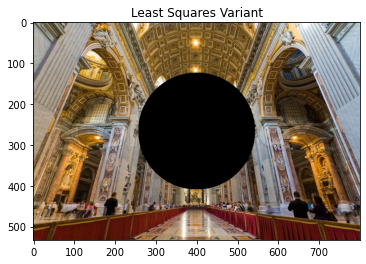

In [346]:
data,tennis,target = loadImages()
vs, ys = extractNormals(data)
A = computeBasis(vs)
# reduce the number of samples because computing the SVD on
# the entire data set takes too long
Ap = A[::50]
ysp = ys[::50]

coeffLSV = LSV(Ap,ysp)
imgLSV = relightSphere(tennis,coeffLSV)
targetLSV = compositeImages(imgLSV,target)

print('Least Squares Variant Coefficients:\n'+str(coeffLSV))
plt.figure()
plt.imshow(targetLSV)
plt.title('Least Squares Variant')
plt.show()
imwrite(floc+'lsv_output.png',img_as_ubyte(targetLSV))

### Part h

In the previous part, you should have noticed that the visualization is drastically different than the one generated using least squares. Recall that in total least squares we are minimizing $\|\begin{bmatrix}\varepsilon_{A} & \varepsilon_y \end{bmatrix}\|^2_F$. Intuitively, to minimize the Frobenius norm of components of both the inputs and outputs, the inputs and outputs should be on the same scale. However, this is not the case here. 

Color values in an image will typically be in $[0, 255]$, but the original image had a much larger range. We compressed the range to a smaller scale using tone mapping, but the effect of the compression is that relatively bright areas of the image become less bright. 

As a compromise, we scaled the image colors down to a maximum color value of $384$ instead of $255$. Thus, the inputs here are all unit vectors, and the outputs are three dimensional vectors where each value is in $[0,384]$. 

**To do:** Rewrite the LSV function with an optional scale parameter $s$ that will be used to scale the $y$ values as follows
$$y_{\text{scaled}}=\frac{y}{s}$$
Propose a value by which to scale the outputs $f(v_i)$ such that the values of the inputs and outputs are roughly on the same scale. Solve this scaled  version of the problem using the least squares variant, and report the computed spherical harmonic coefficients and provide a rendering of the relit sphere.

### Solution to Part h
Recall: the least squares variant assumes that the noise is the same in all directions. When we just have some data, it can be hard to think about what the noise model should be. The default is to take a “significant figures” mentality and assume that everything should be on the same scale, assuming that noise is roughly proportional to the size of the inputs. Because most of the basis functions lie within $[−1, 1]$, we want to scale the image pixel values so that they lie in a similar range. For these results, we can scale the values by 1/384, but any reasonable value that scales the pixel values to a similar range is acceptable

In [347]:
def LSV(A, ys, s=1):
    '''
    Least Squares Variant
    Inputs:
    - A: m x 9 data matrix
    - y: m x 3 observation matrix
    - s: this scale parameter will scale the ys
             i.e. ys/s

    Outputs:
    - coeff: 9 x 3 matrix of coefficients "gamma"
    '''
    # Build the combined matrices
    XY = A
    ys = ys/s
    for i in range(ys.shape[1]):
        np.append(XY, ys[i])
    
    # run svd on combined data matrix 
    # hint the v output of svd is V^T
    u,S,v = la.svd(XY)
    d = ys.shape[1]
    n = A.shape[1]
    v11 = v[:n, :n]
    v12 = v[:n, n-d:]
    print(v.shape)
    print(v11.shape)
    print(v12.shape)
    v11 = la.inv(v11)
    # extract the coefficients from the svd using the formula you derived in parts a--e
    coeff = np.matmul(v11, v12)
    return coeff

(9, 9)
(9, 9)
(9, 3)


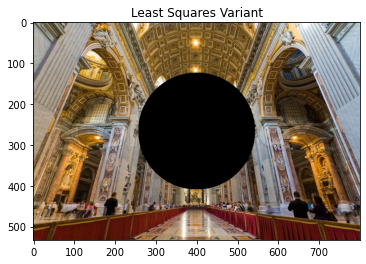

In [348]:
data,tennis,target = loadImages()
vs, ys = extractNormals(data)
A = computeBasis(vs)
# reduce the number of samples because computing the SVD on
# the entire data set takes too long
Ap = A[::50]
ysp = ys[::50]

coeffLSVScaled = LSV(Ap,ysp,s=384) # TODO fill in a value for s

imgLSV = relightSphere(tennis,coeffLSVScaled)
targetLSV = compositeImages(imgLSV,target)

plt.figure()
plt.imshow(targetLSV)
plt.title('Least Squares Variant')
plt.show()
imwrite(floc+'lsv_output.png',img_as_ubyte(targetLSV))

# [Problem 2]: Gradient Descent on Linear Regression: Parts f, g

In this problem, we will apply gradient descent to an underdetermined linear regression problem on synthetic data. We will verify that the iterates of gradient descent converge to the least norm solution $x_{UD}$

### Synthetic Data

First, we generate a random train matrix $A$ and labels $b$

In [352]:
n, m = 200, 1000

In [353]:
A = np.random.normal(size = (n,m), scale = 3)
x_gt = 10*np.ones(m)
b = A @ x_gt

In [354]:
x_UD = A.T @ np.linalg.inv (A @ A.T) @ b 

### Part (f): Implement GD

(f) Below, implement gradient descent on the linear regression problem with initial point _start, constant stepsize _alpha and stopping threshold _eps.

The stopping rule we adopt is to terminate the algorithm when the least squares objective is smaller than _eps. **Note that** this is a different stopping rule than the last python assignment.

In [355]:
_start = np.zeros(m)
_alpha = 0.01
_eps = 1e-14

In [356]:
def gradF(x):
    #TODO
    return np.matmul(np.transpose(A), (np.matmul(A, x)-b))

def runGradientDescent(start, alpha, eps):
    """
    input: start (initial guess), alpha (step-size), eps (tolerance)
    output: iterates (all iterates of gradient descent), counter (number of iterations taken)
    """
    solution = []
    solution.append(start)
    k = 1
    while(np.linalg.norm(np.matmul(A, solution[k-1])-b) >= eps and np.linalg.norm(np.matmul(A, solution[k-1])-b) < float("inf")):
        news = solution[k-1] - alpha*gradF(solution[k-1])
        solution.append(news)
        k+=1
    return solution, k

In [357]:
iterates_gd, counter_gd = runGradientDescent(_start, _alpha, _eps)

### Part (g) Visualize trajectory

(g.1) Plot the distance between the gradient descent iterates and $x_UD$ over time. Use a logarithmic scale on the y-axis. Remark what you observe, and how this connects to the previous parts of the question.

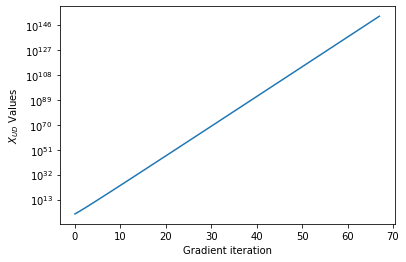

In [358]:
#TODO
dist = []
for i in range(len(iterates_gd)):
    dist.append(la.norm(iterates_gd[i]-x_UD))
plt.figure()
plt.plot(range(counter_gd), dist)
plt.xlabel("Gradient iteration")
plt.ylabel("$X_{UD}$ Values")
plt.yscale('log')
plt.show()

#This has a steady increase with the log scale that we used, meaning it is a logarithmic increase until the XUD values are matched

In [376]:
trajectory = np.array(iterates_gd)
scaler = StandardScaler()
trajectory_norm = scaler.fit_transform(trajectory[:, :])
limit_point_norm = scaler.transform([x_UD])

(g.2) Pre-process the above "trajectory" matrix for PCA, as discussed in lecture. 

Then perform PCA to reduce the dimensionality of the iterates to 2D. Similarly pre-process "limit_point_norm" (which contains $x_{UD}$) and project it onto the top-2 principal components from above.

Now, plot the projected iterates, with subsequent iterates connected by lines. Also plot the projected $x_{UD}$. Remark on what you observe 

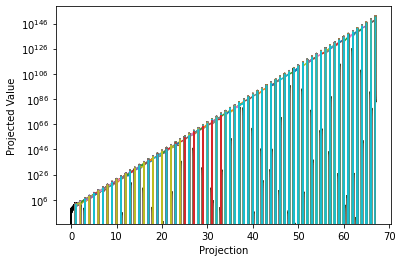

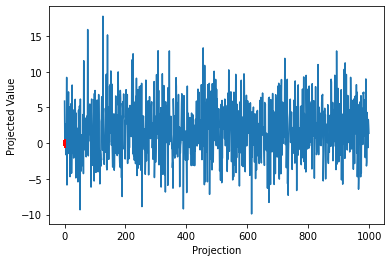

In [394]:
#TODO
covar_mat = np.matmul(trajectory_norm.T, trajectory_norm)
values, vectors = sla.eigh(covar_mat, eigvals = (998, 999))
vectors = vectors.T
projected_features = np.matmul(vectors, trajectory_norm.T)
res_traj = projected_features.dot(trajectory_norm)

covar_mat = np.matmul(limit_point_norm.T, limit_point_norm)
values, vectors = sla.eigh(covar_mat, eigvals = (998, 999))
vectors = vectors.T
projected_features = np.matmul(vectors, limit_point_norm.T)
res_lim = projected_features.dot(limit_point_norm)

plt.figure()
plt.plot(res_traj, color='black')
plt.plot(trajectory)
plt.xlabel("Projected Feature Number")
plt.ylabel("Projected Value")
plt.yscale('log')
plt.show()

plt.figure()
plt.plot(x_UD)
plt.plot(res_lim, color='r')
plt.xlabel("Projected Feature Number")
plt.ylabel("Projected Value")
plt.show()

#For the iterates, we see a steady increase on the log graph, similar to the expected behavior from the previous graph.
# We see the lowest value is the 2 projected features marked black at the bottom.
# For the res_lim, we still see the minimum value is the projected features at the top. It falls directly on the minimum 
# xUD value on the graph